This notebook provides a new features BMI PSA density to the project 

In [1]:

import sys; sys.path.append("../")
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
dataset_source = "/home/oleksii/projects/ohif-orthanc-postgres-docker/datasets/classification/prostate_class_dataset_demography_final_psa_vol_20240828.csv"
df = pd.read_csv(dataset_source, sep=';')

In [3]:
df['birth_year'] = df.apply(lambda x: int(x["PatientBirthDate"].split('-')[0]), axis=1)

df.loc[df["PatientSize"] > 2.3, "PatientSize"] = df["PatientSize"]/100

df['BMI'] = np.where((df['PatientSize'].isna() | df['PatientWeight'].isna()), 
                     np.nan, 
                     df.apply(lambda x: (x["PatientWeight"]/(x["PatientSize"]**2)), axis=1))
# Find the next minimum value in the column
# df.loc[df['volume_tz'] == 0.0, "volume_tz"] =  df['volume_tz'][df['volume_tz'] != 0.0].min()
# df.loc[df['volume_pz'] == 0.0, "volume_pz"] =  df['volume_pz'][df['volume_pz'] != 0.0].min()
df.loc[df['volume_tz'] < 2.0, "volume_tz"] =  2.0
df.loc[df['volume_pz'] < 1.0, "volume_pz"] =  1.0


df['volume_prostata'] = df['volume_tz'] + df['volume_pz']

df['PSAd'] = np.where(df['psa'].isna(), np.nan, df.apply(lambda x: float(str(x["psa"]).split(',')[-1]) / x['volume_prostata'], axis=1))
df['TZPSAd'] = np.where(df['psa'].isna(), np.nan, df.apply(lambda x: float(str(x["psa"]).split(',')[-1]) / x['volume_tz'], axis=1)) 
df['PZPSAd'] = np.where(df['psa'].isna(), np.nan, df.apply(lambda x: float(str(x["psa"]).split(',')[-1]) / x['volume_pz'], axis=1)) 

In [4]:
# add compatible classes
df['prostatitis'] = df['class'].str.contains('CI')
df['GS6'] = df['GS'] == '6'
df['GS7a'] = df['GS'] == '7a'
df['GS7b'] = df['GS'] == '7b'
df['GS8'] = df['GS'] == '8'
df['GS9_10'] = (df['GS'] == '9') | (df['GS'] == '10')

In [5]:
df.to_csv(dataset_source.replace(".csv", "_feat.csv"), sep=';', index=False)

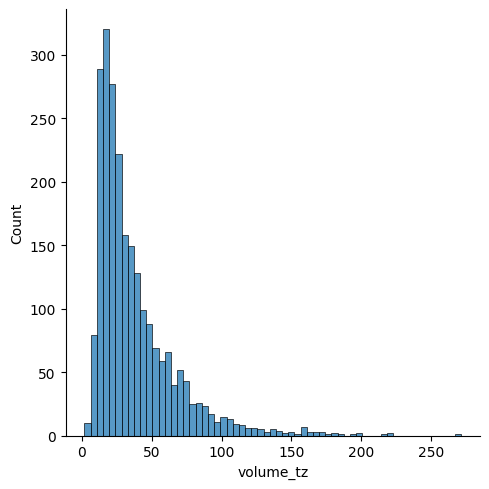

In [6]:
sns.displot(df['volume_tz'])

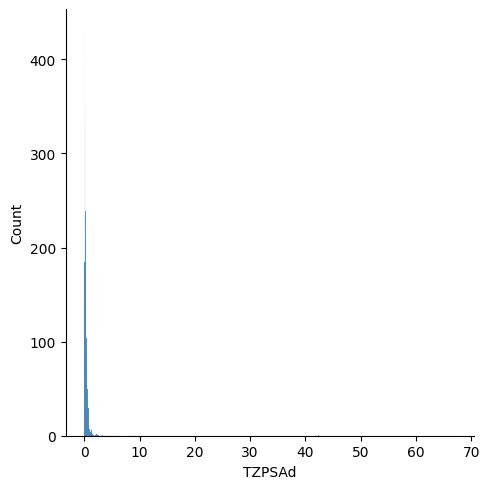

In [63]:
sns.displot(df['TZPSAd'])


In [64]:
df.columns

Index(['study_orthanc_id', 'PatientID', 'class', 'GS', 'csPCa', 'GS_order',
       'class_order', 'PatientBirthDate', 'PatientSize', 'PatientWeight',
       'StudyDate', 'PatientAgeAtStudy', 'ALTAPatientID', 'psa', 'freePSA',
       'ratioPSA', 'CRP', 'censitiveCRP', 'psaDate', 'volume_pz', 'volume_tz',
       'BMI', 'volume_prostata', 'PSAd', 'TZPSAd', 'PZPSAd'],
      dtype='object')